# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
# 📚 Basic Libraries
import pandas as pd
import numpy as np

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.metrics import balanced_accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ⚙️ Settings
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [4]:
# Copy dataframe
df = data.copy()
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [6]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax        float64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [7]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.eq(" ").sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [10]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

In [11]:
# We keep the continuous data
cnum_df = df.loc[:, df.nunique() > 20]
cnum_df

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,22.0


In [12]:
# Looking for correlations with the target
cnum_df.corrwith(cnum_df["medv"]).sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
age       -0.376955
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
dtype: float64

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [13]:
# Your code here :
# Split X and y
X_n = cnum_df.drop(columns="medv")
y_c = cnum_df.medv

In [14]:
# Split the data into training 80% and testing 20%
X_train, X_test, y_train, y_test = train_test_split(X_n, y_c, test_size =0.2, random_state=42) 

In [15]:
print(f'100% of our data: {len(cnum_df)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 506.
80% for training data: 404.
20% for test data: 102.


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [16]:
# Your code here :
# Train the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
# Make predictions on the test dataset
predictions_test = model.predict(X_test)

In [18]:
# Make predictions on the training dataset
predictions_train = model.predict(X_train)

## 3. Calculate and print R-squared for both the training and the testing set.

In [19]:
# Your code here :
# R2 for testing set
r2_test = r2_score(y_test, predictions_test) 
print("R2 test = ", round(r2_test, 4))

# R2 for training set
r2_train = r2_score(y_train, predictions_train) 
print("R2 train = ", round(r2_train, 4))

R2 test =  0.6308
R2 train =  0.7363


## 4. Calculate and print mean squared error for both the training and the testing set.

In [20]:
# Your code here :
# MSE for testing set
MSE_test = mean_squared_error(y_test, predictions_test)
print("MSE test = ", round(MSE_test, 4))

# MSE for training set
MSE_train = mean_squared_error(y_train, predictions_train)
print("MSE train = ", round(MSE_train, 4))

MSE test =  27.0764
MSE train =  22.905


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [21]:
# Your code here :
# MAE for testing set
MAE_test = mean_absolute_error(y_test, predictions_test)
print("MAE test = ", round(MAE_test, 4)) 

# MAE for training set
MAE_train = mean_absolute_error(y_train, predictions_train)
print("MAE train = ", round(MAE_train, 4)) 

MAE test =  3.4099
MAE train =  3.3291


## Classification Model Evaluation

In [22]:
from sklearn.datasets import load_iris
data = load_iris()

In [23]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [24]:
column_names = data.feature_names
column_names 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
df = pd.DataFrame(data['data'],columns=column_names)

In [26]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
target = pd.DataFrame(data.target)

In [28]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [29]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [30]:
# Check for imbalanced data
target.value_counts()

0
0    50
1    50
2    50
Name: count, dtype: int64

In [31]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [32]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [33]:
df.eq(" ").sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [34]:
df.duplicated().sum()

1

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [35]:
# Your code here :
# X-y split
X = df
y = target

In [36]:
# Train Test Split
# Training 80%, testing 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print(f'100% of our data: {len(df)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 150.
80% for training data: 120.
20% for test data: 30.


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [38]:
# Your code here :
model_c= LogisticRegression()
model_c.fit(X_train, y_train)

LogisticRegression()

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [39]:
# Your code here :
# Make predictions on the test dataset
predictions_test_c = model_c.predict(X_test)

In [40]:
# Make predictions on the training dataset
predictions_train_c = model_c.predict(X_train)

In [41]:
# Classification report for test
print(classification_report(y_test, predictions_test_c))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [42]:
# Classification report for test
print(classification_report(y_train, predictions_train_c))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.93      0.96        41
           2       0.93      1.00      0.96        39

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.97       120
weighted avg       0.98      0.97      0.97       120



## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [43]:
# Your code here :
# Accuracy score for testing set
accuracy_test = balanced_accuracy_score(y_test, predictions_test_c)
print("Baanced accuracy test = ", round(accuracy_test, 4))

Baanced accuracy test =  1.0


In [44]:
# Accuracy score for training set
accuracy_train = balanced_accuracy_score(y_train, predictions_train_c)
print("Balanced accuracy train = ", round(accuracy_train, 4))

Balanced accuracy train =  0.9756


## 10. Calculate and print the precision score for both the training and the testing set.

In [45]:
# Your code here :
# Precision score for test set
# We use 'macro' since we have a multi-class classification and our data is equaly distributed.
# Macro does not consider the class distribution
precision_test = precision_score(y_test, predictions_test_c, average='macro')
print("Precision test = ", round(precision_test, 4))

Precision test =  1.0


In [46]:
# Your code here :
# Precision score for test set
# We use 'macro' since we have a multi-class classification and our data is equaly distributed.
# Macro does not consider the class distribution
precision_train = precision_score(y_train, predictions_train_c, average='macro')
print("Precision train = ", round(precision_train, 4))

Precision train =  0.9762


## 11. Calculate and print the recall score for both the training and the testing set.

In [47]:
# Your code here :
# Precision score for test set
recall_test = recall_score(y_test, predictions_test_c, average='macro')
print("Recall test = ", round(recall_test, 4))

Recall test =  1.0


In [48]:
# Precision score for train set
recall_train = recall_score(y_train, predictions_train_c, average='macro')
print("Recall train = ", round(recall_train, 4))

Recall train =  0.9756


## 12. Calculate and print the F1 score for both the training and the testing set.

In [49]:
# Your code here :
# Precision score for test set
f1_test = f1_score(y_test, predictions_test_c, average='macro')
print("F1 score test = ", round(f1_test, 4))

F1 score test =  1.0


In [50]:
# Precision score for test set
f1_train = f1_score(y_train, predictions_train_c, average='macro')
print("F1 score train = ", round(f1_train, 4))

F1 score train =  0.975


## 13. Generate confusion matrices for both the training and the testing set.

In [51]:
# Your code here :
# Confusion matrix test
cm_test = confusion_matrix(y_test, predictions_test_c)

<Figure size 800x600 with 0 Axes>

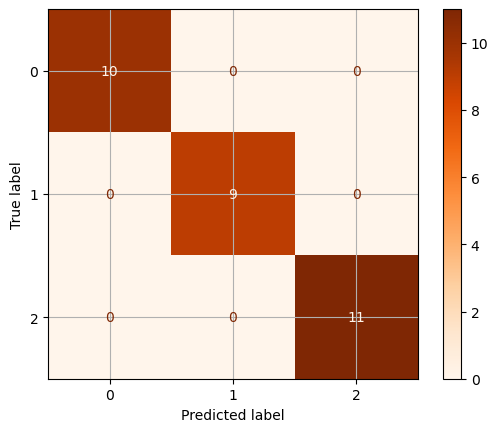

In [52]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

In [53]:
# Confusion matrix train
cm_train = confusion_matrix(y_train, predictions_train_c)

<Figure size 800x600 with 0 Axes>

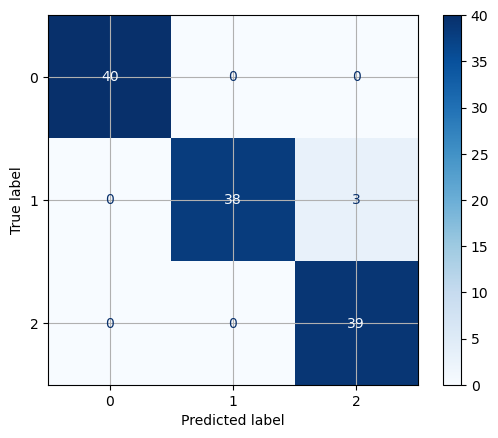

In [54]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')  
plt.grid(True)
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [55]:
# Have fun here !s
# Numerical

from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X_n, y_c, test_size =0.2, random_state=42) 

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
predictions_tree = tree.predict(X_test)

r2_3_4 = r2_score(y_test, predictions_tree)
RMSE_3_4 = root_mean_squared_error(y_test, predictions_tree)
MSE_3_4 = mean_squared_error(y_test, predictions_tree)
MAE_3_4 = mean_absolute_error(y_test, predictions_tree)

#Printing the results
print("R2 = ", round(r2_3_4, 4))
print("RMSE = ", round(RMSE_3_4, 4))
print("The value of the metric MSE is ", round(MSE_3_4, 4))
print("MAE = ", round(MAE_3_4, 4))

R2 =  0.8701
RMSE =  3.0869
The value of the metric MSE is  9.5287
MAE =  2.2814


In [56]:
# Categorical
from sklearn.neighbors import KNeighborsClassifier
import plotly.graph_objs as go

X = df
y = target

# Training 80%, testing 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_neighbors = range(1, 30)
test = []
train = []

for k in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    test.append(model.score(X_test,y_test))
    train.append(model.score(X_train,y_train))

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(n_neighbors), y=train, name='Training Accuracy'))
fig.add_trace(go.Scatter(x=list(n_neighbors), y=test, name='Testing Accuracy'))
fig.update_layout(xaxis_title='Max Neighboors', yaxis_title='Accuracy', title='')
fig.show()

In [57]:
# choose the better k
model = KNeighborsClassifier(n_neighbors=10)
model = model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

